In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd
import numpy as np

data = [[1,99],[99,1]]

chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 188.18
P-value: 7.936107563214447e-43
Degrees of freedom: 1
Expected frequencies:
[[50. 50.]
 [50. 50.]]


In [ ]:
from scipy.stats import fisher_exact

data = [[3,2],[1,4]]

oddsratio, p_value = fisher_exact(data)

print(f"Odds ratio: {oddsratio}")
print(f"P-value: {p_value}")

Odds ratio: 6.0
P-value: 0.5238095238095238


- Observations:
  - Version A: = [200 150 250 350 150 150 350 250 150 250 150 150 200   0   0 100  50]
  - Version B: = [300 150 150 400 250 250 150 200 250 150 300 200 250 200]

- Distribution plot:


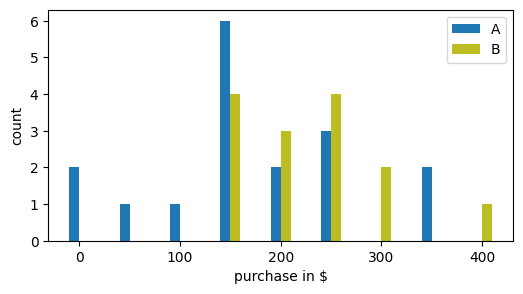

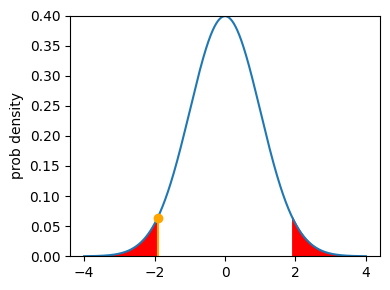

t-statistic: -1.909775505804381


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define sample sizes for Version A and Version B
n_x, n_y = 17, 14  # Sample sizes for Version A (x) and Version B (y)

# Define normal distributions for the revenue data of A and B
d1 = norm(loc=200, scale=100)  # Version A: mean = 200, std = 100
d2 = norm(loc=280, scale=90)   # Version B: mean = 280, std = 90

# Discretize the revenue values to nearest multiple of 50
disc = 50
x = (d1.rvs(size=n_x) / disc).astype(int) * disc  # Generate and round data for Version A
y = (d2.rvs(size=n_y) / disc).astype(int) * disc  # Generate and round data for Version B

# Print observations for both versions
print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")

# Plot the distribution of the revenue values
print("- Distribution plot:")
f, ax = plt.subplots(figsize=(6, 3))  # Create a figure and axis for the plot

# Iterate through datasets, labels, and colors to create bar plots
for i, (x_, l_, c_) in enumerate(zip([x, y], ["A", "B"], ["tab:blue", "tab:olive"])):
    v, c = np.unique(x_, return_counts=True)  # Find unique revenue values and their counts
    ax.bar(v-5+10*i, c, width=10, label=l_, color=c_)  # Plot bars with adjusted positions and colors

# Label the axes and add a legend
ax.set_xlabel("purchase in $")  # Label for x-axis
ax.set_ylabel("count")  # Label for y-axis
ax.legend()  # Add legend to distinguish A and B
plt.show()  # Display the plot

# Function to visualize p-value region and test statistic
def plot_pval(distribution, t_val, xlims=(-5, 5), ylims=(0, 0.5)):
    xxx = np.linspace(*xlims, 1000)  # Generate x-values for plotting the distribution
    f, ax = plt.subplots(figsize=(4, 3))  # Create a figure and axis

    # Plot the distribution curve
    ax.plot(xxx, distribution.pdf(xxx))
    ax.set_ylim(ylims)  # Set limits for the y-axis

    # Mark the test statistic (t_val) on the plot
    ax.vlines(t_val, 0, distribution.pdf(t_val), color='orange')  # Vertical line for t_val
    ax.plot(t_val, distribution.pdf(t_val), 'o', color='orange')  # Mark the t_val point

    # Shade the p-value regions
    xp = xxx <= t_val  # Left tail region
    ax.fill_between(xxx[xp], 0, distribution.pdf(xxx[xp]), color='r')  # Shade left p-value region
    xp = xxx >= -t_val  # Right tail region
    ax.fill_between(xxx[xp], 0, distribution.pdf(xxx[xp]), color='r')  # Shade right p-value region

    # Label the y-axis and adjust layout
    ax.set_ylabel("prob density")
    f.tight_layout()
    return f, ax

# Perform a simple t-test approximation to calculate a test statistic (placeholder example)
t_stat = (x.mean() - y.mean()) / np.sqrt(np.var(x)/n_x + np.var(y)/n_y)  # Calculate t-statistic

# Plot the p-value visualization using the standard normal distribution
plot_pval(norm(), t_stat, xlims=(-4, 4), ylims=(0, 0.4))
plt.show()
print(f"t-statistic: {t_stat}")

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

successes = [60,50]

samples = [100,100]

stat, p_value = proportions_ztest(successes, samples)

print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

Z-statistic: 1.4213381090374024
P-value: 0.1552184896846841


In [ ]:
from scipy.stats import mannwhitneyu
#checking that the medians are different
group_a = [10,12,13,11,14]

group_b = [8,9,11,7,10]

stat, p_value = mannwhitneyu(group_a, group_b)

print(f"   - U value: {stat:.3f}")
print(f"   - p-value: {p_value*100:.1f}%")

   - U value: 23.000
   - p-value: 3.6%


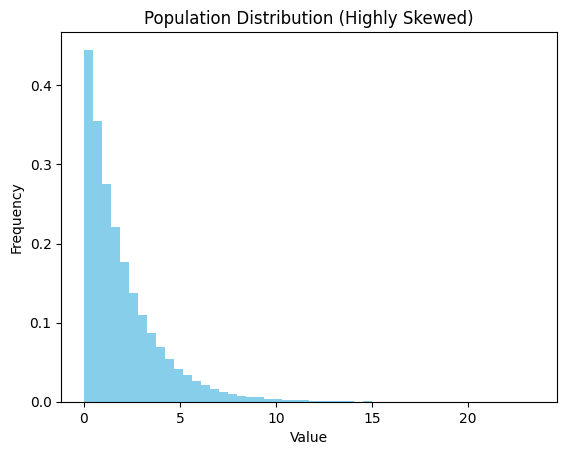

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a skewed population (e.g., exponential distribution)
population = np.random.exponential(scale=2, size=100000)

# Visualize the population distribution
plt.hist(population, bins=50, color='skyblue', density=True)
plt.title("Population Distribution (Highly Skewed)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


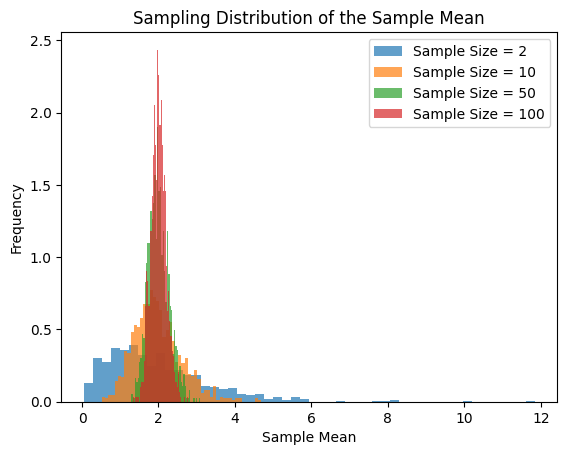

In [ ]:
sample_sizes = [2, 10, 50, 100]  # Different sample sizes
sampling_means = {}

for n in sample_sizes:
    sample_means = [np.mean(np.random.choice(population, size=n)) for _ in range(1000)]
    sampling_means[n] = sample_means

    # Plot the distribution of sample means
    plt.hist(sample_means, bins=50, alpha=0.7, density=True, label=f"Sample Size = {n}")

plt.title("Sampling Distribution of the Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()


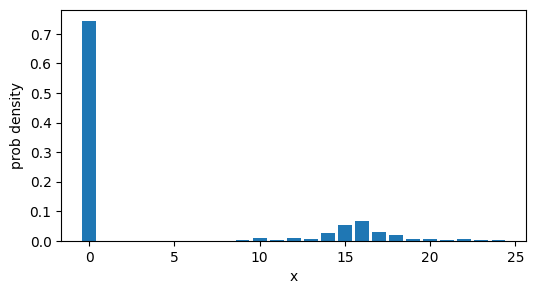

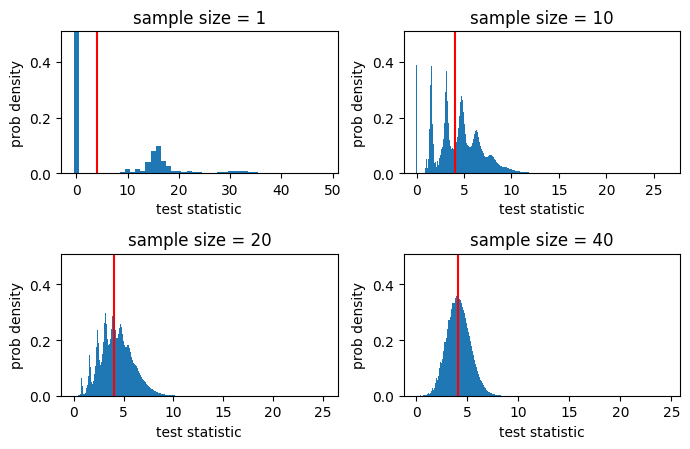

In [ ]:
p = np.array([245, 0, 0, 0, 0, 0, 0, 0, 0,  1, 3, 1, 3, 2, 9, 18, 22, 10, 6, 2, 2, 1, 2, 1, 1])
a = np.arange(len(p))
p = p / p.sum()

f, ax = plt.subplots(figsize=(6, 3))
ax.bar(a, p)
ax.set_ylabel("prob density")
ax.set_xlabel("x");


loc = (p*np.arange(len(p))).sum()

nn = [1, 10, 20, 40]
f, axx = plt.subplots(2, 2, figsize=(3.5*2, 2.3*2))

for i, n in enumerate(nn):
    r, c = divmod(i, 2)
    x = p
    ax = axx[r, c]
    for _ in range(n):
        x = np.convolve(x, p)

    ax.bar(np.arange(len(x))/n, x*n, width=1/n)
    ax.set_ylim([0, 0.51])
    ax.vlines(loc, 0, 0.51, 'r')
    ax.set_xlabel("test statistic")
    ax.set_ylabel("prob density")
    ax.set_title(f"sample size = {n}")

f.tight_layout()


In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Data from the table
emails_sent_A = 500
purchases_A = 45
revenue_A = 5000

emails_sent_B = 500
purchases_B = 55
revenue_B = 6500

# Conversion rates
conversion_rate_A = purchases_A / emails_sent_A
conversion_rate_B = purchases_B / emails_sent_B

# 1. Type of test: This is a test of proportions since we are comparing conversion rates.

# 2. Null and alternative hypotheses:
# Null hypothesis (H0): Conversion rate of Version B <= Conversion rate of Version A
# Alternative hypothesis (H1): Conversion rate of Version B > Conversion rate of Version A

# 3. Perform a statistical test
# Using a two-proportion z-test
successes = np.array([purchases_B, purchases_A])
samples = np.array([emails_sent_B, emails_sent_A])
z_stat, p_value = proportions_ztest(successes, samples, alternative='larger')

# Print results
print(f"Conversion Rate for A: {conversion_rate_A:.2%}")
print(f"Conversion Rate for B: {conversion_rate_B:.2%}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. Version B performs significantly better than Version A.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that Version B performs better than Version A.")


Conversion Rate for A: 9.00%
Conversion Rate for B: 11.00%
Z-statistic: 1.0541
P-value: 0.1459
Fail to reject the null hypothesis. There is not enough evidence to conclude that Version B performs better than Version A.


In [ ]:
import scipy.stats as stats
import numpy as np

# Data from the table
emails_sent_A = 500
purchases_A = 45
revenue_A = 5000

emails_sent_B = 500
purchases_B = 55
revenue_B = 6500

# Conversion rates
conversion_rate_A = purchases_A / emails_sent_A
conversion_rate_B = purchases_B / emails_sent_B

# 1. Type of test: This is a test of proportions since we are comparing conversion rates.

# 2. Null and alternative hypotheses:
# Null hypothesis (H0): Conversion rate of Version B <= Conversion rate of Version A
# Alternative hypothesis (H1): Conversion rate of Version B > Conversion rate of Version A

# 3. Perform a Pearson's chi-squared test
# Create a contingency table
contingency_table = np.array([
    [purchases_A, emails_sent_A - purchases_A],
    [purchases_B, emails_sent_B - purchases_B]
])

chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table, correction=False)

# Print results
print(f"Conversion Rate for A: {conversion_rate_A:.2%}")
print(f"Conversion Rate for B: {conversion_rate_B:.2%}")
print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. Version B performs significantly better than Version A.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that Version B performs better than Version A.")


Conversion Rate for A: 9.00%
Conversion Rate for B: 11.00%
Chi-squared statistic: 1.1111
P-value: 0.2918
Fail to reject the null hypothesis. There is not enough evidence to conclude that Version B performs better than Version A.


In [ ]:
import scipy.stats as stats
import numpy as np

# Given data
total_revenue_A = 5000
total_revenue_B = 6500
purchases_A = 45
purchases_B = 55

# Calculate mean revenue per purchase
mean_revenue_A = total_revenue_A / purchases_A
mean_revenue_B = total_revenue_B / purchases_B

# Assume standard deviations (as individual data is unavailable)
# For simplicity, we use the mean revenue as a proxy for variance estimation (simplified approach)
std_revenue_A = mean_revenue_A * 0.1  # Assume 10% of the mean as std deviation
std_revenue_B = mean_revenue_B * 0.1

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind_from_stats(
    mean1=mean_revenue_A, std1=std_revenue_A, nobs1=purchases_A,
    mean2=mean_revenue_B, std2=std_revenue_B, nobs2=purchases_B
)

# Print results
print(f"Mean Revenue per Purchase for A: ${mean_revenue_A:.2f}")
print(f"Mean Revenue per Purchase for B: ${mean_revenue_B:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in revenue per purchase between Version A and Version B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in revenue per purchase between Version A and Version B.")


Mean Revenue per Purchase for A: $111.11
Mean Revenue per Purchase for B: $118.18
T-statistic: -3.0572
P-value: 0.0029
Reject the null hypothesis. There is a significant difference in revenue per purchase between Version A and Version B.
